In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [80]:
from sklearn.datasets import make_blobs

X, y = make_blobs(centers=4, random_state=42, n_samples=1000, cluster_std=2.0)
y = y % 2

In [81]:
import mglearn

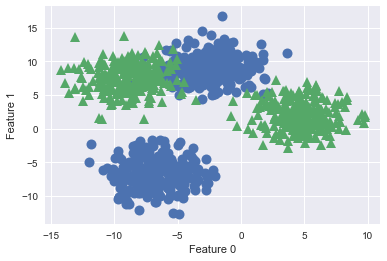

In [82]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [83]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

linear_svm = LinearSVC()
linear_svm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [84]:
predictions = linear_svm.predict(X_test)

In [85]:
from sklearn.metrics import classification_report,confusion_matrix

In [86]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 64  78]
 [ 45 113]]


             precision    recall  f1-score   support

          0       0.59      0.45      0.51       142
          1       0.59      0.72      0.65       158

avg / total       0.59      0.59      0.58       300



In [87]:
# Compute the minimum value per feature on the training set
min_on_training = X_train.min(axis=0)
# Compute the range of each feature (max - min) on the training set
range_on_training = (X_train - min_on_training).max(axis=0)

# subtract the min, divide by range
# afterward, min=0 and max=1 for each feature
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Minimum for each feature\n{}".format(X_train_scaled.min(axis=0)))
print("Maximum for each feature\n {}".format(X_train_scaled.max(axis=0)))

Minimum for each feature
[ 0.  0.]
Maximum for each feature
 [ 1.  1.]


In [88]:
# use THE SAME transformation on the test set,
# using min and range of the training set. See Chapter 3 (unsupervised learning) for details.
X_test_scaled = (X_test - min_on_training) / range_on_training

In [89]:
linear_svm = LinearSVC()
linear_svm.fit(X_train_scaled,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [90]:
predictions = linear_svm.predict(X_test_scaled)

In [91]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 64  78]
 [ 44 114]]


             precision    recall  f1-score   support

          0       0.59      0.45      0.51       142
          1       0.59      0.72      0.65       158

avg / total       0.59      0.59      0.59       300



In [92]:
X_new = np.hstack([X,X[:,1:]**2])

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X_new,y,test_size=0.3,random_state=101)

linear_svm = LinearSVC()
linear_svm.fit(X_train,y_train)

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [94]:
predictions = linear_svm.predict(X_test)

In [95]:
print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[ 88  54]
 [ 14 144]]


             precision    recall  f1-score   support

          0       0.86      0.62      0.72       142
          1       0.73      0.91      0.81       158

avg / total       0.79      0.77      0.77       300



# 커널 서포트 벡터 머신

In [96]:
from sklearn.model_selection import train_test_split

In [97]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)

In [98]:
from sklearn.svm import SVC

In [99]:
model = SVC()

In [100]:
model.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [101]:
predictions = model.predict(X_test)

In [102]:
from sklearn.metrics import classification_report,confusion_matrix

In [103]:
print(confusion_matrix(y_test,predictions))

[[135   7]
 [  9 149]]


In [104]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.95      0.94       142
          1       0.96      0.94      0.95       158

avg / total       0.95      0.95      0.95       300



In [123]:
model = SVC(C=1000,gamma=0.001)

In [124]:
model.fit(X_train,y_train)

SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [125]:
predictions = model.predict(X_test)

In [126]:
from sklearn.metrics import classification_report,confusion_matrix

In [127]:
print(confusion_matrix(y_test,predictions))

[[138   4]
 [  9 149]]


In [128]:
print(classification_report(y_test,predictions))

             precision    recall  f1-score   support

          0       0.94      0.97      0.96       142
          1       0.97      0.94      0.96       158

avg / total       0.96      0.96      0.96       300



In [60]:
import mglearn

In [61]:
X, y = mglearn.tools.make_handcrafted_dataset()

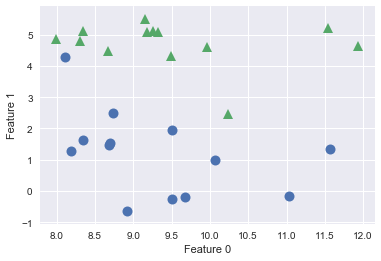

In [64]:
mglearn.discrete_scatter(X[:,0],X[:,1],y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

In [66]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=101)
from sklearn.svm import LinearSVC
model = LinearSVC()
model.fit(X_train,y_train)
predictions = model.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,predictions))
print('\n')
print(classification_report(y_test,predictions))

[[4 0]
 [0 4]]


             precision    recall  f1-score   support

          0       1.00      1.00      1.00         4
          1       1.00      1.00      1.00         4

avg / total       1.00      1.00      1.00         8

